In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv("/content/drive/MyDrive/imdb_reviews.txt",sep = '\t', header = None)

In [8]:
data.columns = ['reviews', 'sentiment']

In [9]:
data.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [10]:
data.shape

(748, 2)

In [11]:
data['sentiment'].unique()

array([0, 1])

Text Proprocessing

In [12]:
data['sentiment'].value_counts()

,count
sentiment,
1,386
0,362


In [13]:
data.isnull().sum()

,0
reviews,0
sentiment,0


In [14]:
data.duplicated().sum()

np.int64(3)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
import nltk
import re

In [18]:
nltk.download("punkt")
nltk.download("punkt_tab") # tokenization
nltk.download("wordnet") #tag
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger_eng') # pos tagging
from bs4 import BeautifulSoup # parsing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [19]:
stop_words=nltk.corpus.stopwords.words("english")

In [20]:
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default

In [21]:
#lemmatization
from nltk.stem import WordNetLemmatizer
ln=WordNetLemmatizer()

In [22]:
def text_preprocessing(text):
  # html tags removal
  soup=BeautifulSoup(text,"html.parser")
  text=soup.get_text()

  text=re.sub(r'(\r\n|\r|\n)+','/n',text)
  text=re.sub(r'[^a-zA-Z0-9\s]',"",text)  #special words symbols removal
  text=text.lower()
  text=text.strip()
  token=nltk.word_tokenize(text) #break sentence to words
  tagged_token=nltk.pos_tag(token)
  # lemmatization
  lem_tokens=[ln.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_token]
  filtered_tokens=[i for i in lem_tokens if i not in stop_words] #stopwords removal
  filtered_text=" ".join(filtered_tokens)
  return filtered_text

In [23]:
data['pre_reviews']=data['reviews'].apply(lambda x:text_preprocessing(x))

In [24]:
data.head()

,reviews,sentiment,pre_reviews
0,"A very, very, very slow-moving, aimless movie ...",0,slowmoving aimless movie distressed drifting y...
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...
2,Attempting artiness with black & white and cle...,0,attempt artiness black white clever camera ang...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo try find song keep ru...


In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
data.head()

,reviews,sentiment,pre_reviews
0,"A very, very, very slow-moving, aimless movie ...",0,slowmoving aimless movie distressed drifting y...
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...
2,Attempting artiness with black & white and cle...,0,attempt artiness black white clever camera ang...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo try find song keep ru...


In [28]:
pip install -U spacy # for glove vectors

In [29]:
!pip install wordcloud

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
text1=' '.join(data['pre_reviews'])

In [32]:
text=" ".join(data[data['sentiment']==1]['pre_reviews']) # positive sentiments

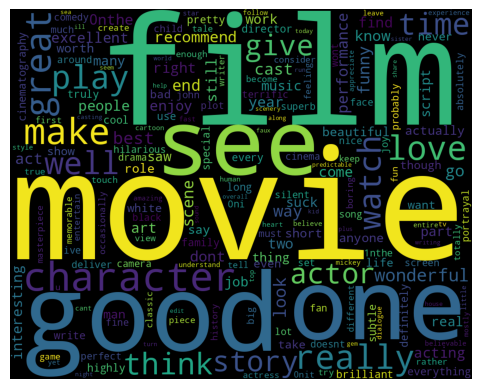

In [33]:
wc=WordCloud(width=1000, height=800).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [34]:
text=" ".join(data[data['sentiment']==0]['pre_reviews'])

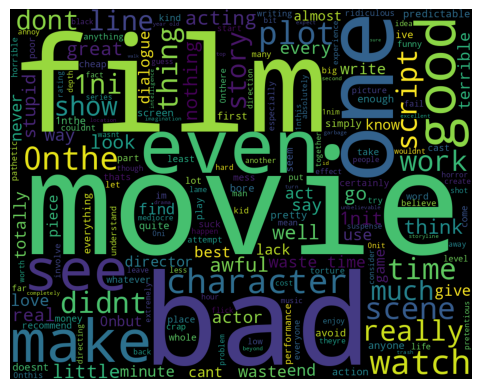

In [35]:
wc=WordCloud(width=1000, height=800).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

# Text representation

TF-IDF feature extraction

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
x1=data['pre_reviews']
y1=data['sentiment']

In [38]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x1)

In [39]:
X.shape, y1.shape

((745, 2778), (745,))

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2, random_state = 0, stratify = y1)

In [42]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((596, 2778), (596,), (149, 2778), (149,))

Random Forest

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state =42)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer

pp=Pipeline([('bow', CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',RandomForestClassifier())])

In [47]:
classifier_rf=pp.fit(x1_train,y1_train)

In [48]:
prediction_rf=classifier_rf.predict(x1_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('confusion Matrix', confusion_matrix(y1_test, prediction_rf))
print('\n')
#plot_confusion_matrix(classifier1, x1_test, y1_test, display_labels=[0,1,2,3,4,5])
print(classification_report(y1_test,prediction_rf))

confusion Matrix [[60 13]
 [36 40]]


              precision    recall  f1-score   support

           0       0.62      0.82      0.71        73
           1       0.75      0.53      0.62        76

    accuracy                           0.67       149
   macro avg       0.69      0.67      0.67       149
weighted avg       0.69      0.67      0.66       149



Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [51]:
pp=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',LogisticRegression(solver='liblinear'))])

In [52]:
classifier_logR=pp.fit(x1_train,y1_train)

In [53]:
prediction_logR=classifier_logR.predict(x1_test)

In [54]:
print('confusion Matrix', confusion_matrix(y1_test, prediction_logR))
print('\n')
#plot_confusion_matrix(classifier1, x1_test, y1_test, display_labels=[0,1,2,3,4,5])
print(classification_report(y1_test,prediction_logR))

confusion Matrix [[43 30]
 [11 65]]


              precision    recall  f1-score   support

           0       0.80      0.59      0.68        73
           1       0.68      0.86      0.76        76

    accuracy                           0.72       149
   macro avg       0.74      0.72      0.72       149
weighted avg       0.74      0.72      0.72       149



Glove Embedding

In [55]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [56]:
import spacy # capture context of data whereas spacy captures the repeated version
nlp=spacy.load('en_core_web_lg')

In [57]:
def get_vec(x):
  doc=nlp(x)
  vec=doc.vector
  return vec

In [58]:
data['Glove']=data['pre_reviews'].apply(lambda x: get_vec(x))

In [59]:
data.head()

,reviews,sentiment,pre_reviews,Glove
0,"A very, very, very slow-moving, aimless movie ...",0,slowmoving aimless movie distressed drifting y...,"[0.033679284, -0.07567986, -0.16047786, 0.0005..."
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...,"[0.15441644, 0.28305253, -0.13184263, 0.083682..."
2,Attempting artiness with black & white and cle...,0,attempt artiness black white clever camera ang...,"[-0.26978555, -0.02390889, -0.07035084, -0.092..."
3,Very little music or anything to speak of.,0,little music anything speak,"[-0.1412375, 0.3050325, -0.23658249, 0.2413775..."
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo try find song keep ru...,"[0.022042409, 0.052952696, -0.09658201, -0.109..."


In [60]:
data['Glove'][0].shape

(300,)

In [61]:
X=np.vstack(data['Glove'].values)

In [62]:
X.shape

(745, 300)

In [63]:
y=data['sentiment']

In [64]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state =42)

Random Forest

In [65]:
glove_classfier_rf=RandomForestClassifier()


In [66]:
glove_classfier_rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [67]:
y_pred=glove_classfier_rf.predict(x1_test)

In [68]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        73
           1       0.86      0.84      0.85        76

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149



Logistic Regression

In [69]:
glove_logR=LogisticRegression()

In [70]:
glove_logR.fit(x1_train,y1_train)

LogisticRegression()

In [71]:
y_pred=glove_logR.predict(x1_test)

In [72]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        73
           1       0.82      0.84      0.83        76

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.83       149
weighted avg       0.83      0.83      0.83       149



ANN model building and training

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [74]:
model = Sequential()
model.add(Dense(units = 128, activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(x1_train,y1_train, batch_size=4, epochs=20)

Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6999 - loss: 0.5854
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8418 - loss: 0.3586
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8851 - loss: 0.2633
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9354 - loss: 0.1938
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9461 - loss: 0.1389
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9703 - loss: 0.0977
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9763 - loss: 0.0687
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0698
Epoch 9/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - loss: 0.0498
Epoch 10/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0329
Epoch 11/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0706
Epoch 12/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [77]:
y_pred = model.predict(x1_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [78]:
y_pred[:5]

array([[6.6013658e-01],
       [9.4881507e-05],
       [1.4683074e-01],
       [9.9999988e-01],
       [9.9979138e-01]], dtype=float32)

In [79]:
y_pred = (y_pred >= 0.5).astype(int)

In [80]:
y_pred[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [81]:
cm=confusion_matrix(y1_test, y_pred)

<Axes: >

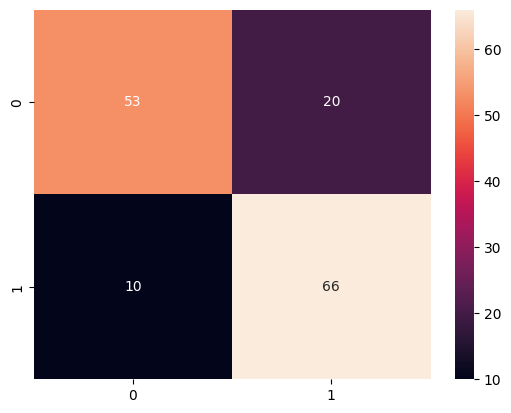

In [82]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [83]:
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        73
           1       0.77      0.87      0.81        76

    accuracy                           0.80       149
   macro avg       0.80      0.80      0.80       149
weighted avg       0.80      0.80      0.80       149



LSTM's

doc.vector (which you’re using now) gives one 300‑D vector for the whole document. To grab the GloVe vector for each individual word, iterate over the tokens and collect their .vector values.

LSTM: Long short term memory, suitable for sequential data.They need 3d input

In [84]:
def get_vec(x):
  doc=nlp(x)
  vecs=[tok.vector for tok in doc]
  return np.array(vecs,dtype=np.float32)

In [85]:
data['word_glove']=data['pre_reviews'].apply(get_vec)

In [86]:
data.head()

,reviews,sentiment,pre_reviews,Glove,word_glove
0,"A very, very, very slow-moving, aimless movie ...",0,slowmoving aimless movie distressed drifting y...,"[0.033679284, -0.07567986, -0.16047786, 0.0005...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...,"[0.15441644, 0.28305253, -0.13184263, 0.083682...","[[0.040567, 0.21175, -0.59301, -0.053492, 0.11..."
2,Attempting artiness with black & white and cle...,0,attempt artiness black white clever camera ang...,"[-0.26978555, -0.02390889, -0.07035084, -0.092...","[[-0.24352, -0.24027, -0.171, 0.32326, -0.5709..."
3,Very little music or anything to speak of.,0,little music anything speak,"[-0.1412375, 0.3050325, -0.23658249, 0.2413775...","[[-0.4716, 0.25148, -0.36664, 0.32902, 0.07374..."
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo try find song keep ru...,"[0.022042409, 0.052952696, -0.09658201, -0.109...","[[-0.51704, 0.32636, 0.13205, -0.2452, 0.45463..."


In [87]:
data['pre_reviews'][3]

'little music anything speak'

In [88]:
data['word_glove'][3].shape

(4, 300)

In [89]:
max_len=50
emb_dim=300


In [90]:
X=np.zeros((len(data),max_len,300),dtype=np.float32)   #(sample,100,300)

In [91]:
for i , vec in enumerate(data['word_glove']):
  length=min(len(vec),max_len)
  X[i,:length,:]=vec[:length]

In [92]:
print(X.shape)

(745, 50, 300)


In [93]:
y=data['sentiment']

In [94]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((596, 50, 300), (596,), (149, 50, 300), (149,))

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
LSTM_Model=Sequential([
    LSTM(128,input_shape=(max_len,emb_dim)),
    Dropout(0.3),  #neurons fopped by mentioned percent here is 30
    Dense(1,activation='sigmoid')
])

In [136]:
LSTM_Model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
LSTM_Model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 128)            │       219,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,777 (858.50 KB)

 Trainable params: 219,777 (858.50 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
callbacks=[EarlyStopping(patience=5,restore_best_weights=True)]

In [138]:
LSTM_Model.fit(x_train,y_train,epochs=20,batch_size=4,validation_data=(x_test,y_test),callbacks=callbacks,verbose=2)  #batch size would be divisible by 2
#verbose says whether it shows output ot not

Epoch 1/20
149/149 - 11s - 73ms/step - accuracy: 0.4933 - loss: 0.6982 - val_accuracy: 0.5101 - val_loss: 0.6930
Epoch 2/20
149/149 - 10s - 68ms/step - accuracy: 0.5772 - loss: 0.6689 - val_accuracy: 0.5436 - val_loss: 0.6954
Epoch 3/20
149/149 - 6s - 39ms/step - accuracy: 0.5151 - loss: 0.6991 - val_accuracy: 0.4899 - val_loss: 0.7131
Epoch 4/20
149/149 - 8s - 51ms/step - accuracy: 0.5134 - loss: 0.7040 - val_accuracy: 0.5101 - val_loss: 0.6999
Epoch 5/20
149/149 - 9s - 58ms/step - accuracy: 0.4799 - loss: 0.7154 - val_accuracy: 0.4899 - val_loss: 0.6938
Epoch 6/20
149/149 - 10s - 69ms/step - accuracy: 0.5319 - loss: 0.6959 - val_accuracy: 0.4899 - val_loss: 0.6947


In [146]:
y_pred=LSTM_Model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


In [147]:
y_pred[0]

array([0.518567], dtype=float32)

In [148]:
y_pred = (y_pred >= 0.5).astype(int)  # threshold

In [149]:
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [150]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

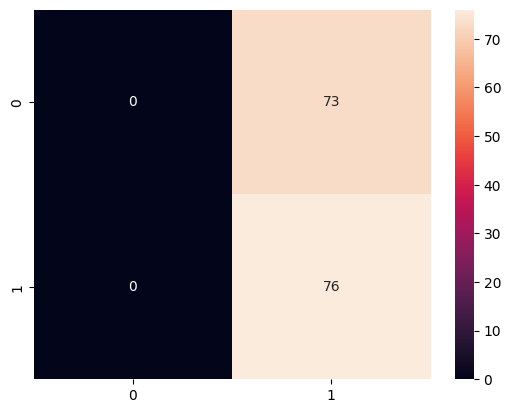

In [151]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

In [153]:
from tensorflow.keras.layers import Bidirectional,GlobalMaxPooling2D

In [156]:
LSTM_Model1=Sequential([
    Masking(mask_value=0.0,input_shape=(max_len,emb_dim)), # we keep such words or value hidden but we disable this
    Bidirectional(LSTM(128,return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

 ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       219,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 659,333 (2.52 MB)

 Trainable params: 219,777 (858.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 439,556 (1.68 MB)

In [157]:
LSTM_Model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [158]:
LSTM_Model1.fit(x_train,y_train,epochs=20,batch_size=4,validation_data=(x_test,y_test),callbacks=callbacks,verbose=2)

Epoch 1/20
149/149 - 20s - 134ms/step - accuracy: 0.7500 - loss: 0.4863 - val_accuracy: 0.8389 - val_loss: 0.3689
Epoch 2/20
149/149 - 20s - 136ms/step - accuracy: 0.8859 - loss: 0.3109 - val_accuracy: 0.8255 - val_loss: 0.3709
Epoch 3/20
149/149 - 15s - 103ms/step - accuracy: 0.9362 - loss: 0.1817 - val_accuracy: 0.8591 - val_loss: 0.3303
Epoch 4/20
149/149 - 20s - 132ms/step - accuracy: 0.9614 - loss: 0.1077 - val_accuracy: 0.8523 - val_loss: 0.4028
Epoch 5/20
149/149 - 21s - 142ms/step - accuracy: 0.9883 - loss: 0.0580 - val_accuracy: 0.8523 - val_loss: 0.4444
Epoch 6/20
149/149 - 20s - 132ms/step - accuracy: 0.9883 - loss: 0.0328 - val_accuracy: 0.8121 - val_loss: 0.6599
Epoch 7/20
149/149 - 16s - 109ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.8456 - val_loss: 0.6293
Epoch 8/20
149/149 - 15s - 98ms/step - accuracy: 0.9564 - loss: 0.1307 - val_accuracy: 0.8054 - val_loss: 0.4517


In [160]:
y_pred=LSTM_Model1.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step


In [161]:
y_pred[0]

array([0.19928807], dtype=float32)

In [162]:
y_pred=(y_pred>=0.5).astype(int)

In [163]:
y_pred[0:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [166]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

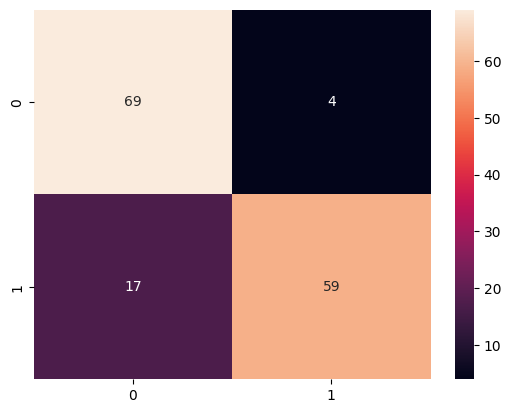

In [167]:
sns.heatmap(cm,annot=True)

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        73
           1       0.94      0.78      0.85        76

    accuracy                           0.86       149
   macro avg       0.87      0.86      0.86       149
weighted avg       0.87      0.86      0.86       149



In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Masking,Bidirectional,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential([
    Masking(mask_value=0.0,input_shape=(max_len,emb_dim)),
    Bidirectional(LSTM(128, return_sequences=True)),
    #Dropout(0.5),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu'),
    Dense(1, activation="sigmoid")
])

model1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1.summary()

callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]

model1.fit(x_train, y_train,
          epochs=20,
          batch_size=4,
          validation_data=(x_test, y_test),
          callbacks=callbacks,
          verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'global_max_pooling1d' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 50, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 256)        │       439,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,809 (1.74 MB)

 Trainable params: 455,809 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'global_max_pooling1d' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


149/149 - 19s - 130ms/step - accuracy: 0.7651 - loss: 0.4942 - val_accuracy: 0.8591 - val_loss: 0.3307
Epoch 2/20
149/149 - 17s - 115ms/step - accuracy: 0.8993 - loss: 0.2944 - val_accuracy: 0.8859 - val_loss: 0.2908
Epoch 3/20
149/149 - 17s - 117ms/step - accuracy: 0.9413 - loss: 0.1825 - val_accuracy: 0.8658 - val_loss: 0.3431
Epoch 4/20
149/149 - 14s - 97ms/step - accuracy: 0.9648 - loss: 0.1113 - val_accuracy: 0.8456 - val_loss: 0.3234
Epoch 5/20
149/149 - 20s - 137ms/step - accuracy: 0.9748 - loss: 0.0765 - val_accuracy: 0.8322 - val_loss: 0.4323
Epoch 6/20
149/149 - 20s - 137ms/step - accuracy: 0.9916 - loss: 0.0279 - val_accuracy: 0.8255 - val_loss: 0.5164
Epoch 7/20
149/149 - 20s - 135ms/step - accuracy: 0.9966 - loss: 0.0131 - val_accuracy: 0.8322 - val_loss: 0.5768


In [103]:
y_pred = model1.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'global_max_pooling1d' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step


In [104]:
y_pred = (y_pred >= 0.5).astype(int)

In [105]:
cm=confusion_matrix(y1_test, y_pred)

<Axes: >

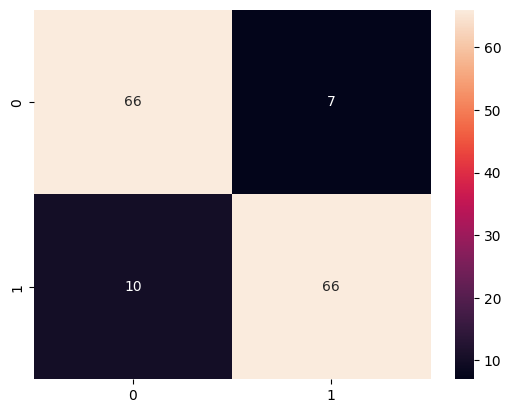

In [106]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [107]:
print(classification_report(y1_test, y_pred))
# when we have imbalanced datset we focus on f1 score and not precision and recall

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        73
           1       0.90      0.87      0.89        76

    accuracy                           0.89       149
   macro avg       0.89      0.89      0.89       149
weighted avg       0.89      0.89      0.89       149



In [169]:
  LSTM_Model1.save('glove_bilstm_sentiment_analysis.h5')

In [108]:
model1.save("glove_lstm_sentiment.h5")

LSTM's

doc.vector (which you’re using now) gives one 300‑D vector for the whole document.
To grab the GloVe vector for each individual word, iterate over the tokens and collect their .vector values.